      Month  Air_Temperature  Daily_Solar_Radiation
0   January             15.9                   5.48
1  February             16.4                   5.47
2     March             17.9                   5.64
3     April             17.6                   5.27
4       May             17.8                   5.17
Air Temperature - Mean Squared Error: 0.0, R-squared Score: 1.0
Daily Solar Radiation - Mean Squared Error: 0.0, R-squared Score: 1.0


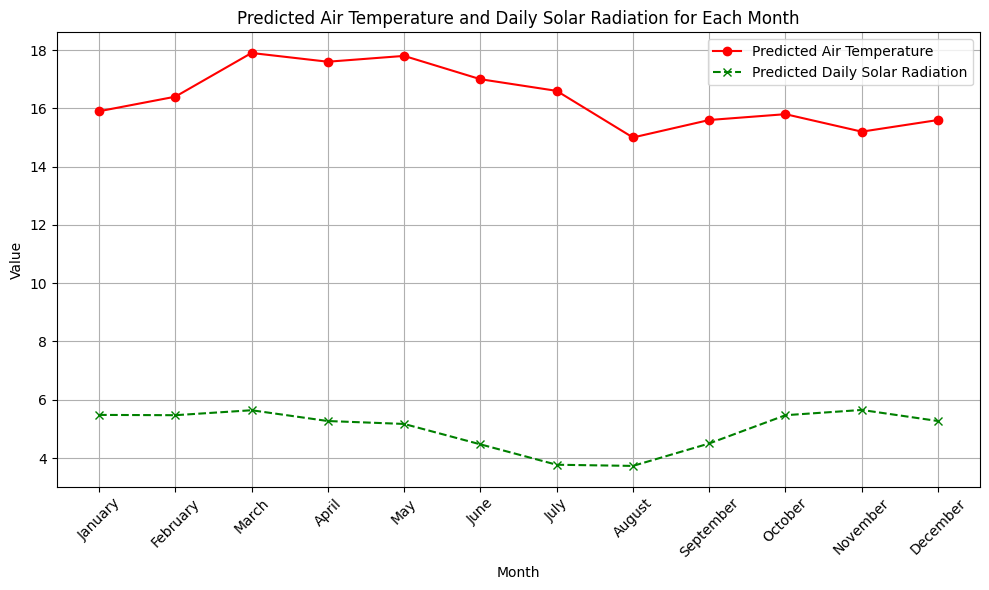

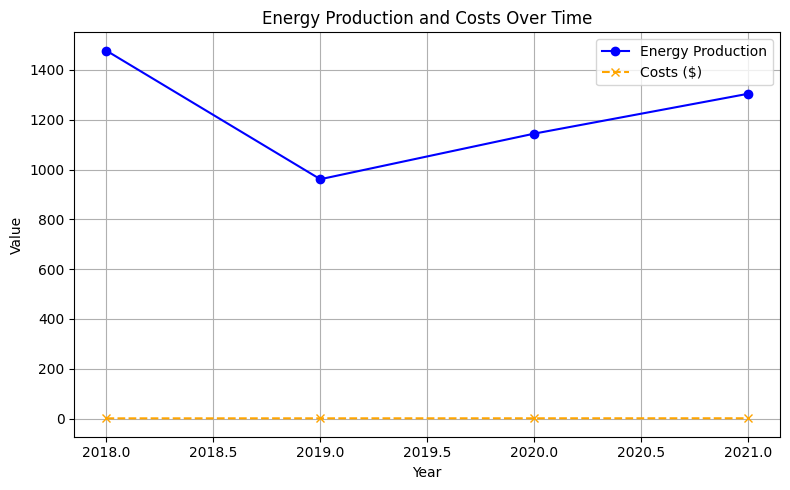

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a dictionary with the data
data = {
    'Month': ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],
    'Air_Temperature': [15.9, 16.4, 17.9, 17.6, 17.8, 17, 16.6, 15, 15.6, 15.8, 15.2, 15.6],
    'Daily_Solar_Radiation': [5.48, 5.47, 5.64, 5.27, 5.17, 4.47, 3.77, 3.73, 4.5, 5.47, 5.65, 5.27]
}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
print(df.head())  # Print the first few rows of the DataFrame

# Assuming 'X' contains features (solar radiation and air temperature) and 'y' contains the target variable (energy output)
X = df[['Air_Temperature', 'Daily_Solar_Radiation']]
y1 = df['Air_Temperature']
y2 = df['Daily_Solar_Radiation']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

# Initialize the linear regression models
model1 = LinearRegression()
model2 = LinearRegression()

# Fit the models and make predictions for air temperature and solar radiation
model1.fit(X_train, y1_train)
model2.fit(X_train, y2_train)

y1_pred = model1.predict(X_test)
y2_pred = model2.predict(X_test)

# Evaluate the models
mse1 = mean_squared_error(y1_test, y1_pred)
r2_1 = r2_score(y1_test, y1_pred)

mse2 = mean_squared_error(y2_test, y2_pred)
r2_2 = r2_score(y2_test, y2_pred)

print(f"Air Temperature - Mean Squared Error: {mse1}, R-squared Score: {r2_1}")
print(f"Daily Solar Radiation - Mean Squared Error: {mse2}, R-squared Score: {r2_2}")

# Display the predicted values for each month
months = df['Month']
predicted_temperature = model1.predict(df[['Air_Temperature', 'Daily_Solar_Radiation']])
predicted_radiation = model2.predict(df[['Air_Temperature', 'Daily_Solar_Radiation']])

plt.figure(figsize=(10, 6))
plt.plot(months, predicted_temperature, marker='o', linestyle='-', color='red', label='Predicted Air Temperature')
plt.plot(months, predicted_radiation, marker='x', linestyle='--', color='green', label='Predicted Daily Solar Radiation')
plt.title('Predicted Air Temperature and Daily Solar Radiation for Each Month')
plt.xlabel('Month')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot energy production and costs over time
years = np.arange(2018, 2022)
energy_production = np.random.randint(500, 1500, size=len(years))  # Adjusted to match the length of years

initial_cost = 0.90  # Initial cost in $/kWh
final_cost = 1.20  # Final cost in $/kWh
num_years = len(years)  # Number of years to increase the cost

costs = np.linspace(initial_cost, final_cost, num_years)

plt.figure(figsize=(8, 5))
plt.plot(years, energy_production, marker='o', linestyle='-', color='blue', label='Energy Production')
plt.plot(years, costs, marker='x', linestyle='--', color='orange', label='Costs ($)')
plt.title('Energy Production and Costs Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
